In [1]:
import os
from nixtla import NixtlaClient

base_url = os.environ["AZURE_AI_NIXTLA_BASE_URL"]
api_key = os.environ["AZURE_AI_NIXTLA_API_KEY"]
model = "azureai"

nixtla_client = NixtlaClient(api_key=api_key, base_url=base_url)

In [12]:
nixtla_client.validate_api_key()

False

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


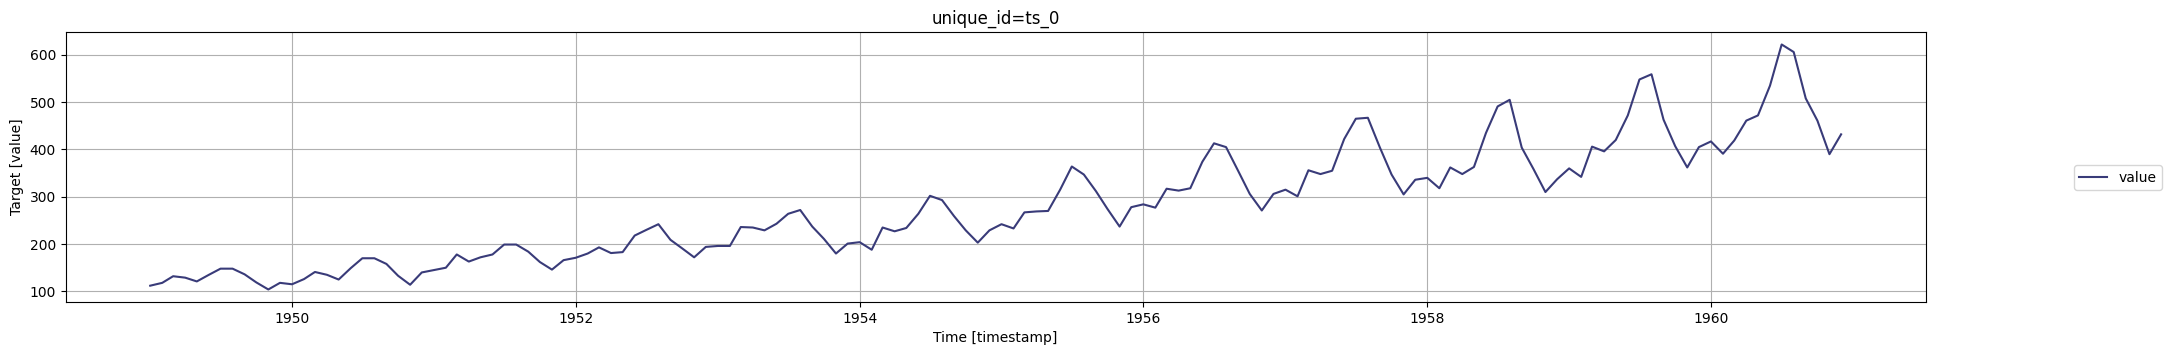

In [8]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

In [9]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=12, freq='MS', time_col='timestamp', target_col='value')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,436.843414
1,1961-02-01,419.351532
2,1961-03-01,458.943176
3,1961-04-01,477.876068
4,1961-05-01,505.656921


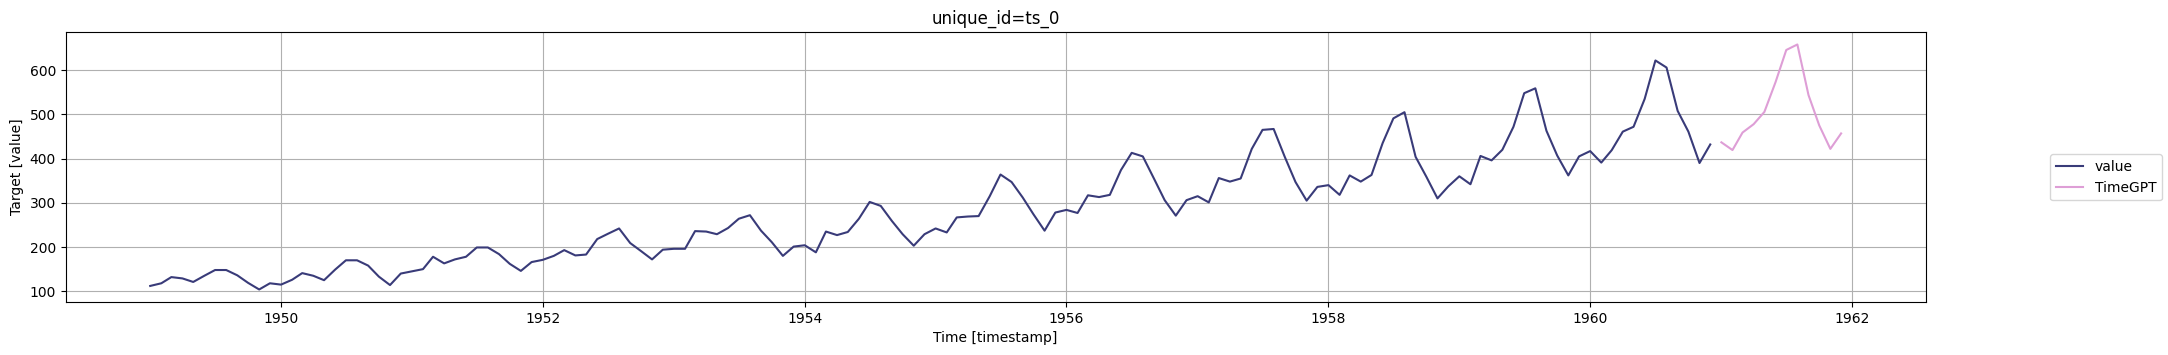

In [10]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


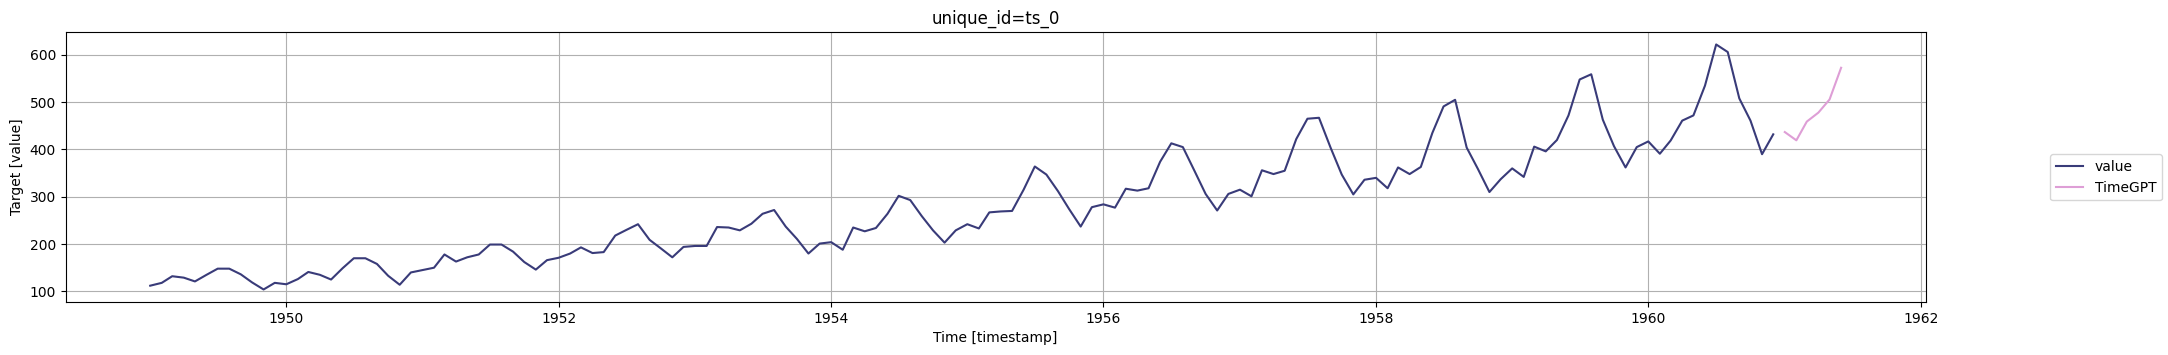

In [13]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=6, time_col='timestamp', target_col='value', freq='MS')
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

In [17]:
df

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


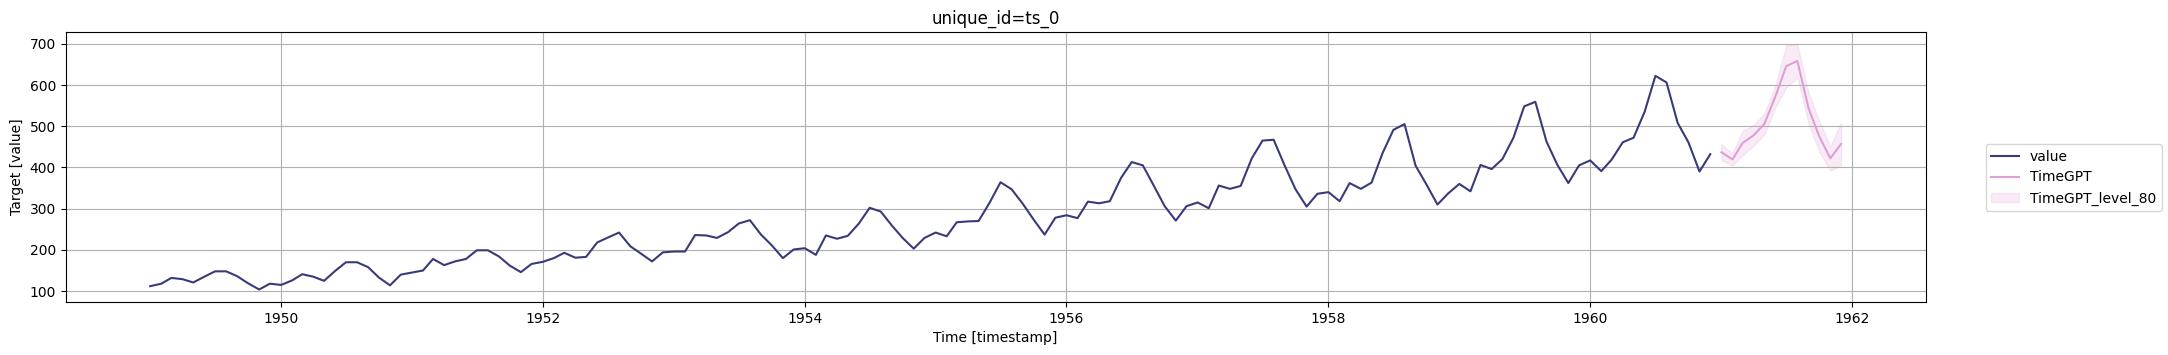

In [14]:
# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv")

# Forecast using a 80% confidence interval
forecast_df = nixtla_client.forecast(
    df=df,
    h=12,
    time_col='timestamp',
    target_col="value",
    level=[80]
)

# Plot predictions with intervals
nixtla_client.plot(
    df=df, 
    forecasts_df=forecast_df, 
    time_col='timestamp', 
    target_col='value',
    level=[80]
)

In [37]:
import yfinance as yf

# Specify the stock ticker symbol
ticker_symbol = 'AAPL'

# Fetch stock data for the specified ticker
stock_data = yf.Ticker(ticker_symbol)

# Get historical market data
historical_data = stock_data.history(period='2y')  # You can adjust the period (e.g., '1d', '5d', '1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max')

# Display the fetched data
historical_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-25 00:00:00-04:00,136.881368,140.203780,136.792378,138.947998,92482700,0.0,0.0
2022-05-26 00:00:00-04:00,135.853010,142.725257,135.605807,142.171524,90601500,0.0,0.0
2022-05-27 00:00:00-04:00,143.763518,148.005519,143.634967,147.965973,90978500,0.0,0.0
2022-05-31 00:00:00-04:00,147.402349,148.974558,145.197286,147.174911,103718400,0.0,0.0
2022-06-01 00:00:00-04:00,148.223046,150.042473,146.027880,147.046371,74286600,0.0,0.0


In [38]:
#make the index a col and the col named 'data'
historical_data.reset_index(inplace=True)
historical_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-05-25 00:00:00-04:00,136.881368,140.203780,136.792378,138.947998,92482700,0.0,0.0
1,2022-05-26 00:00:00-04:00,135.853010,142.725257,135.605807,142.171524,90601500,0.0,0.0
2,2022-05-27 00:00:00-04:00,143.763518,148.005519,143.634967,147.965973,90978500,0.0,0.0
3,2022-05-31 00:00:00-04:00,147.402349,148.974558,145.197286,147.174911,103718400,0.0,0.0
4,2022-06-01 00:00:00-04:00,148.223046,150.042473,146.027880,147.046371,74286600,0.0,0.0
...,...,...,...,...,...,...,...,...
498,2024-05-20 00:00:00-04:00,189.330002,191.919998,189.009995,191.039993,44361300,0.0,0.0
499,2024-05-21 00:00:00-04:00,191.089996,192.729996,190.919998,192.350006,42309400,0.0,0.0
500,2024-05-22 00:00:00-04:00,192.270004,192.820007,190.270004,190.899994,34648500,0.0,0.0
501,2024-05-23 00:00:00-04:00,190.979996,191.000000,186.630005,186.880005,51005900,0.0,0.0


In [39]:
historical_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [40]:
#make Data col a datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date']).dt.date
historical_data



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-05-25,136.881368,140.203780,136.792378,138.947998,92482700,0.0,0.0
1,2022-05-26,135.853010,142.725257,135.605807,142.171524,90601500,0.0,0.0
2,2022-05-27,143.763518,148.005519,143.634967,147.965973,90978500,0.0,0.0
3,2022-05-31,147.402349,148.974558,145.197286,147.174911,103718400,0.0,0.0
4,2022-06-01,148.223046,150.042473,146.027880,147.046371,74286600,0.0,0.0
...,...,...,...,...,...,...,...,...
498,2024-05-20,189.330002,191.919998,189.009995,191.039993,44361300,0.0,0.0
499,2024-05-21,191.089996,192.729996,190.919998,192.350006,42309400,0.0,0.0
500,2024-05-22,192.270004,192.820007,190.270004,190.899994,34648500,0.0,0.0
501,2024-05-23,190.979996,191.000000,186.630005,186.880005,51005900,0.0,0.0


In [65]:
forecast_df = nixtla_client.forecast(
    df=historical_data,
    h=50,
    time_col="Date",
    freq='B',
    target_col="Close",
    level=[80]
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


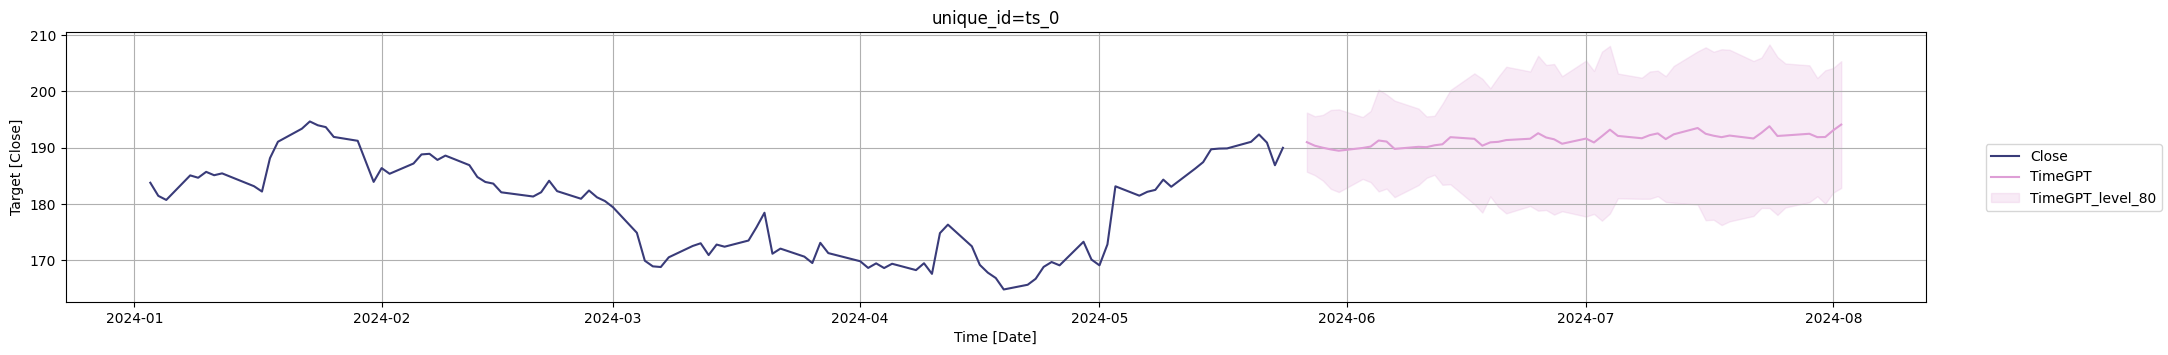

In [66]:
nixtla_client.plot(
    df=historical_data[-100:], 
    forecasts_df=forecast_df, 
    time_col='Date', 
    target_col='Close',
    level=[80]
)